<a href="https://colab.research.google.com/github/njokinjuguna/Machine-learning-Models/blob/main/CropYieldUsingEnsembleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'FAOSTAT_data_en_11-2-2024-has no null data.csv'
data = pd.read_csv(file_path)

# Display initial dataset information to understand its structure
print("Initial Dataset Information:")
print(data.info())

# Filter data for Kenya only and years from 2010 to 2022
filtered_data = data[(data['Area'] == 'Kenya') & (data['Year'] >= 2010) & (data['Year'] <= 2022)]

# Exclude unwanted values in the 'Element' column
unwanted_elements = ['Laying', 'Milk Animals', 'Producing Animals/Slaughtered', 'Yield/Carcass Weight']
filtered_data = filtered_data[~filtered_data['Element'].isin(unwanted_elements)]

# Drop unnecessary columns (e.g., 'Note' column if it's not needed)
filtered_data = filtered_data.drop(columns=['Note'])

# Check for missing and zero values
print("\nMissing Values in Each Column:")
print(filtered_data.isnull().sum())
print("\nRows with Value=0:")
print(filtered_data[filtered_data['Value'] == 0])

# Optionally, drop or handle rows where 'Value' is 0 based on model needs
filtered_data = filtered_data[filtered_data['Value'] != 0]

# Display the cleaned dataset structure and the first few rows
print("\nFiltered Data Information:")
filtered_data.info()
print("\nFirst few rows of the cleaned dataset:")
print(filtered_data.head())


Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       390 non-null    object 
 1   Domain            390 non-null    object 
 2   Area Code (M49)   390 non-null    int64  
 3   Area              390 non-null    object 
 4   Element Code      390 non-null    int64  
 5   Element           390 non-null    object 
 6   Item Code (CPC)   390 non-null    float64
 7   Item              390 non-null    object 
 8   Year Code         390 non-null    int64  
 9   Year              390 non-null    int64  
 10  Unit              390 non-null    object 
 11  Value             390 non-null    float64
 12  Flag              390 non-null    object 
 13  Flag Description  390 non-null    object 
 14  Note              0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 45.8+ KB
None

eda

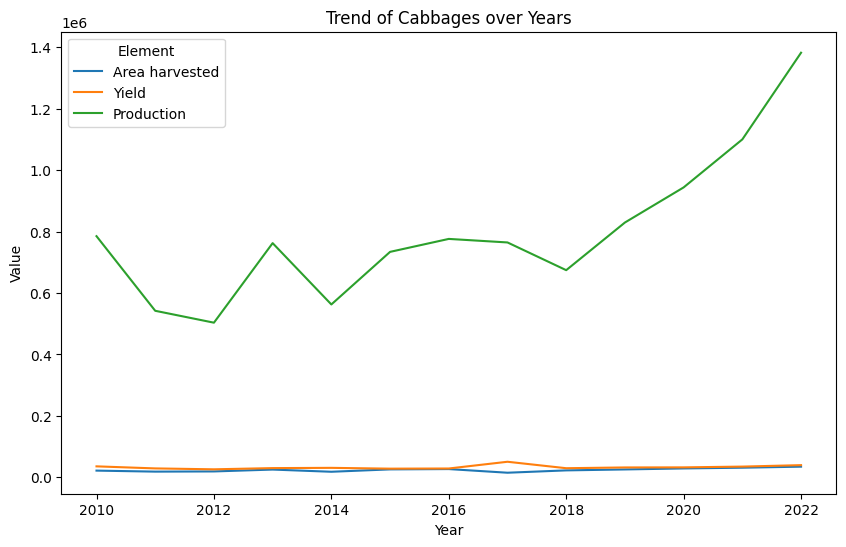

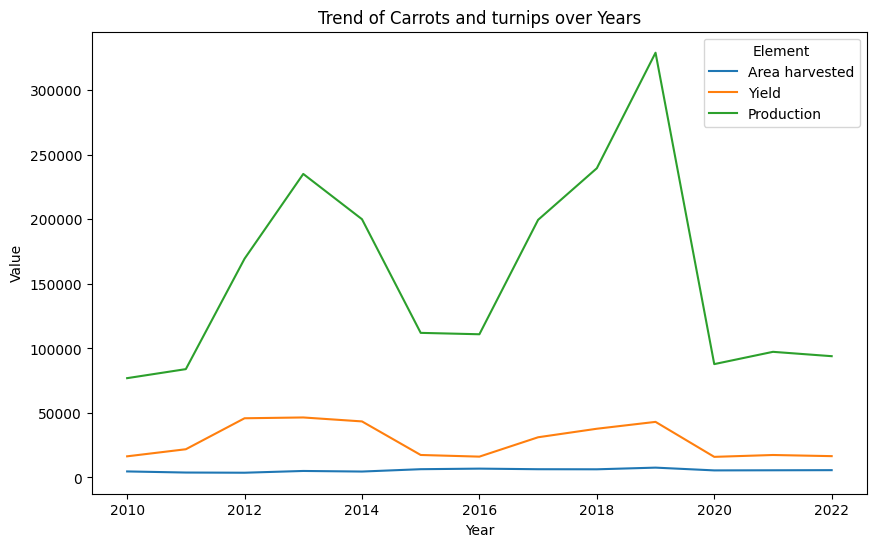

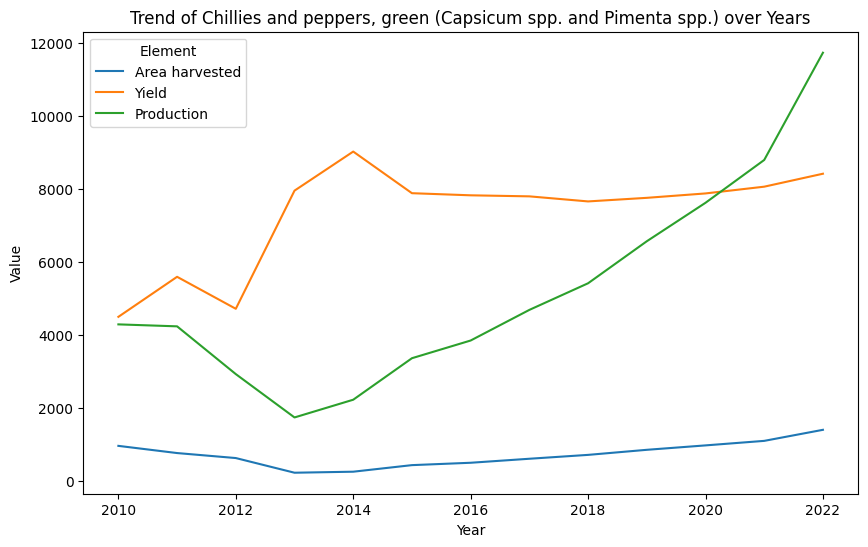

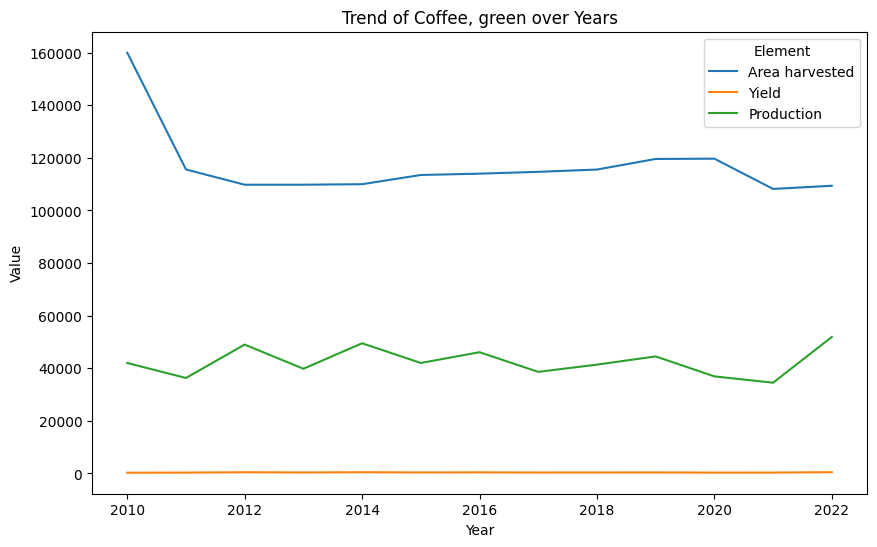

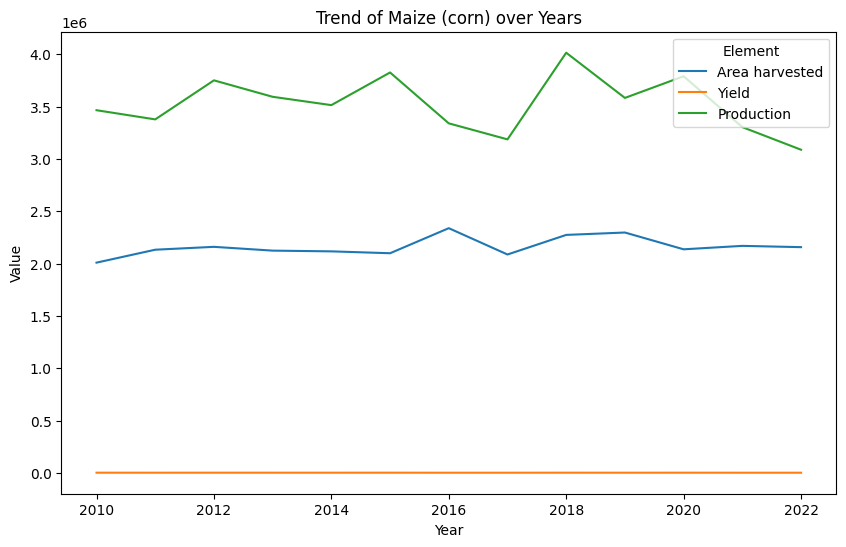

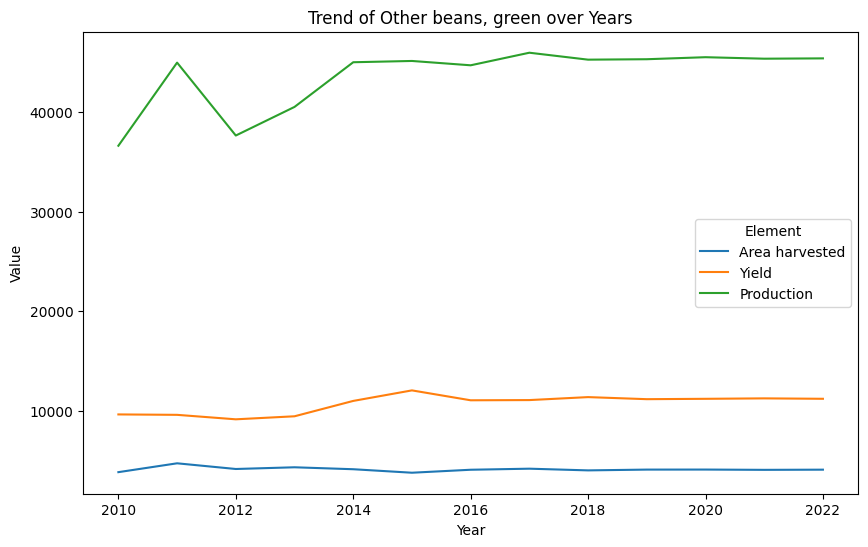

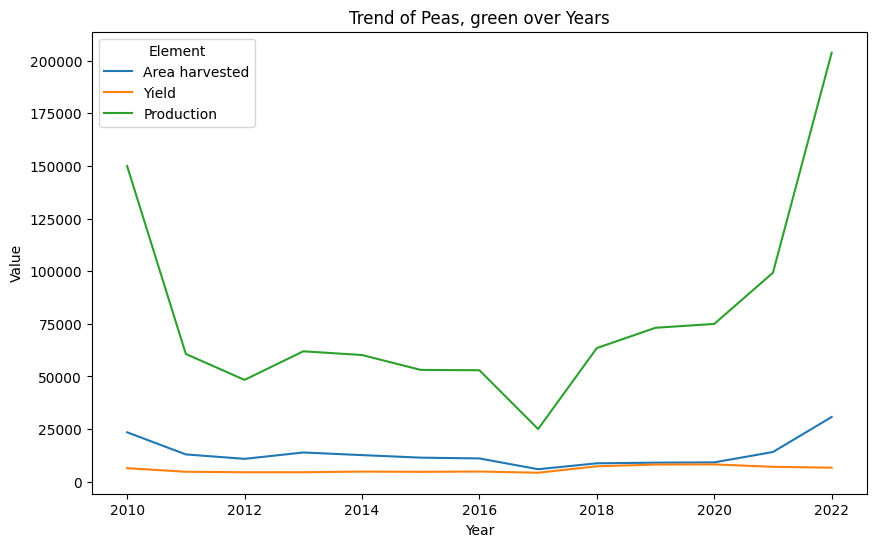

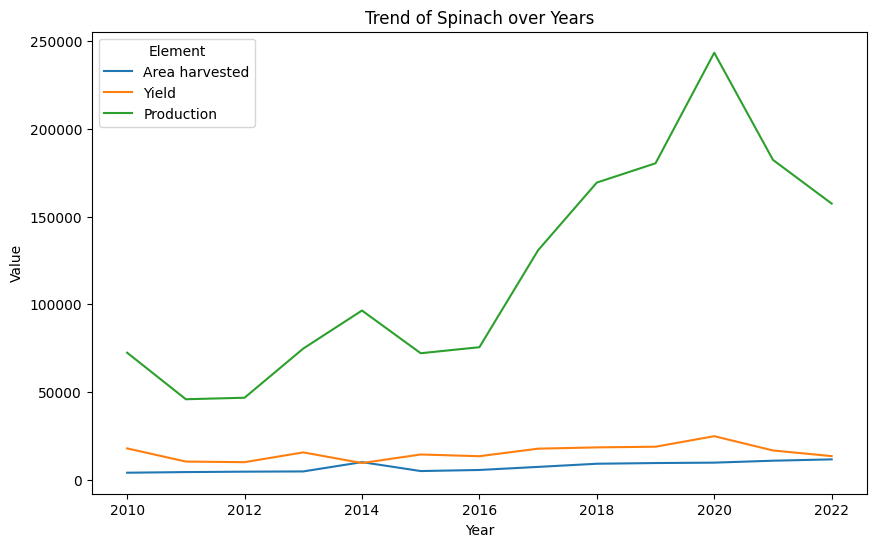

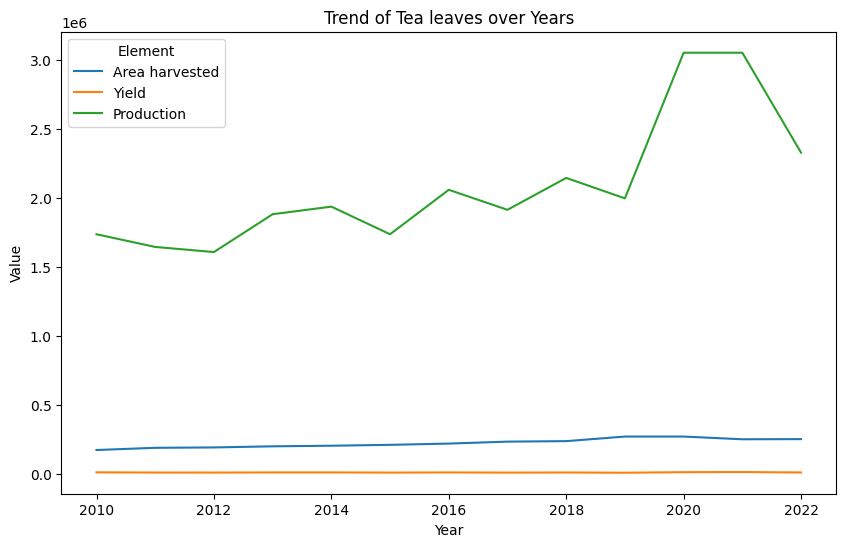

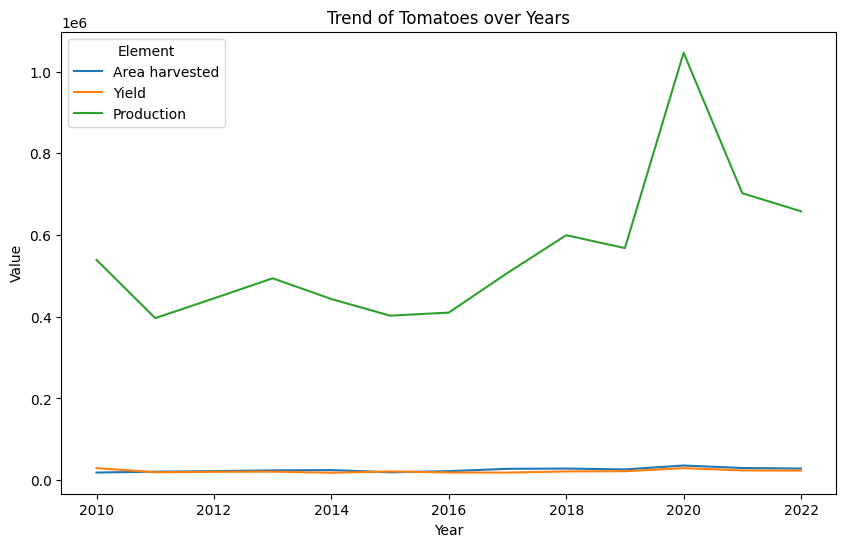

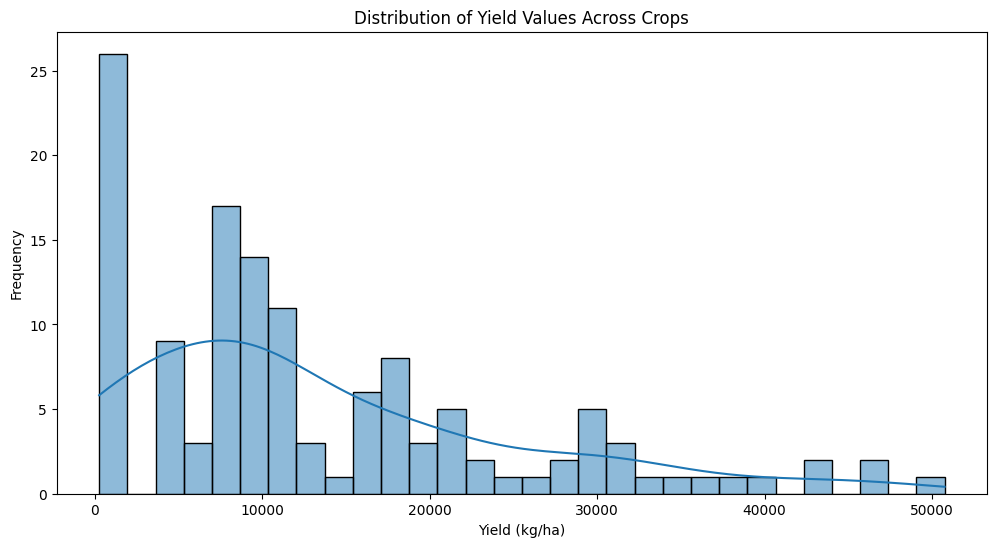

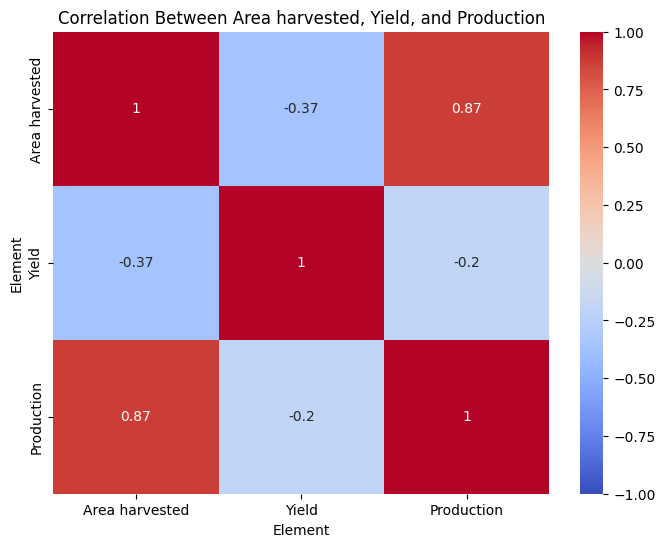

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Trend Analysis for each crop over time
crops = filtered_data['Item'].unique()
for crop in crops:
    crop_data = filtered_data[filtered_data['Item'] == crop]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=crop_data, x='Year', y='Value', hue='Element')
    plt.title(f'Trend of {crop} over Years')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title='Element')
    plt.show()

# Step 2: Distribution Analysis for Yield
yield_data = filtered_data[filtered_data['Element'] == 'Yield']
plt.figure(figsize=(12, 6))
sns.histplot(data=yield_data, x='Value', bins=30, kde=True)
plt.title('Distribution of Yield Values Across Crops')
plt.xlabel('Yield (kg/ha)')
plt.ylabel('Frequency')
plt.show()

# Step 3: Correlation Analysis
# Pivoting data to focus on relevant columns for correlation analysis
pivot_data = filtered_data.pivot_table(index=['Year', 'Item'], columns='Element', values='Value').reset_index()
correlation_data = pivot_data[['Area harvested', 'Yield', 'Production']].dropna().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Area harvested, Yield, and Production')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
file_path = 'FAOSTAT_data_en_11-2-2024-has no null data.csv'
data = pd.read_csv(file_path)

# Filter for rows where Element is "Yield"
yield_data = data[data['Element'] == 'Yield']

# Define features and target
features = ['Year', 'Area Code (M49)', 'Item Code (CPC)']  # Add other relevant features if available
yield_data = yield_data[['Year', 'Area Code (M49)', 'Item Code (CPC)', 'Value']]

# Encode categorical features if necessary (e.g., Area Code or Item Code)
yield_data['Area Code (M49)'] = yield_data['Area Code (M49)'].astype('category').cat.codes
yield_data['Item Code (CPC)'] = yield_data['Item Code (CPC)'].astype('category').cat.codes

# Define X (features) and y (target)
X = yield_data.drop(columns=['Value'])
y = yield_data['Value']



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Initialize the models
# random_forest_model = RandomForestRegressor(random_state=42)
# xgboost_model = XGBRegressor(random_state=42)
# neural_network_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)




# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter grid
# param_grid_rf = {
#     'n_estimators': [100, 200, 500, 1000],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Initialize the model
# rf = RandomForestRegressor(random_state=42)

# # Set up RandomizedSearchCV
# random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf,
#                                       n_iter=20, cv=5, scoring='neg_mean_squared_error',
#                                       random_state=42, n_jobs=-1)

# # Fit the model
# random_search_rf.fit(X_train, y_train)

# # Get the best parameters and model performance
# print("Best Parameters for Random Forest:", random_search_rf.best_params_)
# print("Best Score for Random Forest:", -random_search_rf.best_score_)




Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best Score for Random Forest: 75254669.48177765


In [28]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter grid
# param_grid_xgb = {
#     'n_estimators': [100, 200, 300, 400],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3, 0.5]
# }

# # Initialize the model
# xgb = XGBRegressor(random_state=42)

# # Set up RandomizedSearchCV
# random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
#                                        n_iter=20, cv=5, scoring='neg_mean_squared_error',
#                                        random_state=42, n_jobs=-1)

# # Fit the model
# random_search_xgb.fit(X_train, y_train)

# # Get the best parameters and model performance
# print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
# print("Best Score for XGBoost:", -random_search_xgb.best_score_)


Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best Score for XGBoost: 27389242.571575917


In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid_nn = {
    'hidden_layer_sizes': [(32, 32), (64, 64), (32, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 500, 1000]
}

# Initialize the model
nn = MLPRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search_nn = RandomizedSearchCV(estimator=nn, param_distributions=param_grid_nn,
                                      n_iter=20, cv=5, scoring='neg_mean_squared_error',
                                      random_state=42, n_jobs=-1)

# Fit the model
random_search_nn.fit(X_train, y_train)

# Get the best parameters and model performance
print("Best Parameters for Neural Network:", random_search_nn.best_params_)
print("Best Score for Neural Network:", -random_search_nn.best_score_)


Best Parameters for Neural Network: {'max_iter': 200, 'learning_rate_init': 0.1, 'hidden_layer_sizes': (32, 64, 32), 'alpha': 0.0001, 'activation': 'relu'}
Best Score for Neural Network: 139236481.38148674


In [31]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Define parameter grids
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

param_grid_rf = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the models
xgb = XGBRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
                                       n_iter=20, cv=5, scoring='neg_mean_squared_error',
                                       random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)

# Get best parameters for XGBoost
best_params_xgb = random_search_xgb.best_params_
print("Best Parameters for XGBoost:", best_params_xgb)

# Set up RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf,
                                      n_iter=20, cv=5, scoring='neg_mean_squared_error',
                                      random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Get best parameters for Random Forest
best_params_rf = random_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Initialize models with best parameters
rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
xgb_model = XGBRegressor(**best_params_xgb, random_state=42)

# Fit each model individually before creating the ensemble
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Now create the ensemble using VotingRegressor
ensemble_model = VotingRegressor([('rf', rf_model), ('xgb', xgb_model)])

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions with the ensemble model
ensemble_preds = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_preds)
ensemble_r2 = r2_score(y_test, ensemble_preds)

print("Ensemble Model - Mean Squared Error:", ensemble_mse)
print("Ensemble Model - R2 Score:", ensemble_r2)

# Compare with individual models
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

print("\nRandom Forest (Tuned) - MSE:", mean_squared_error(y_test, rf_preds))
print("XGBoost (Tuned) - MSE:", mean_squared_error(y_test, xgb_preds))



Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Ensemble Model - Mean Squared Error: 33811105.66133728
Ensemble Model - R2 Score: 0.6462263985237588

Random Forest (Tuned) - MSE: 50087539.61414059
XGBoost (Tuned) - MSE: 35149367.54669634


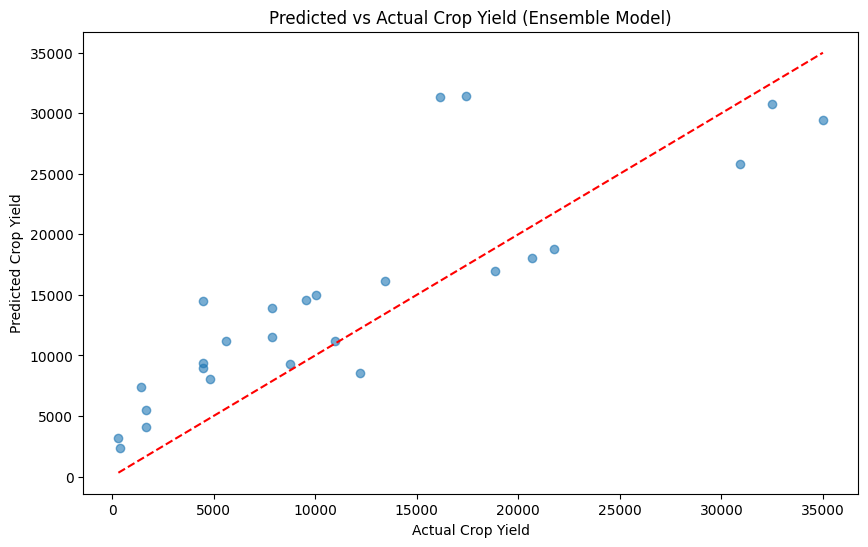

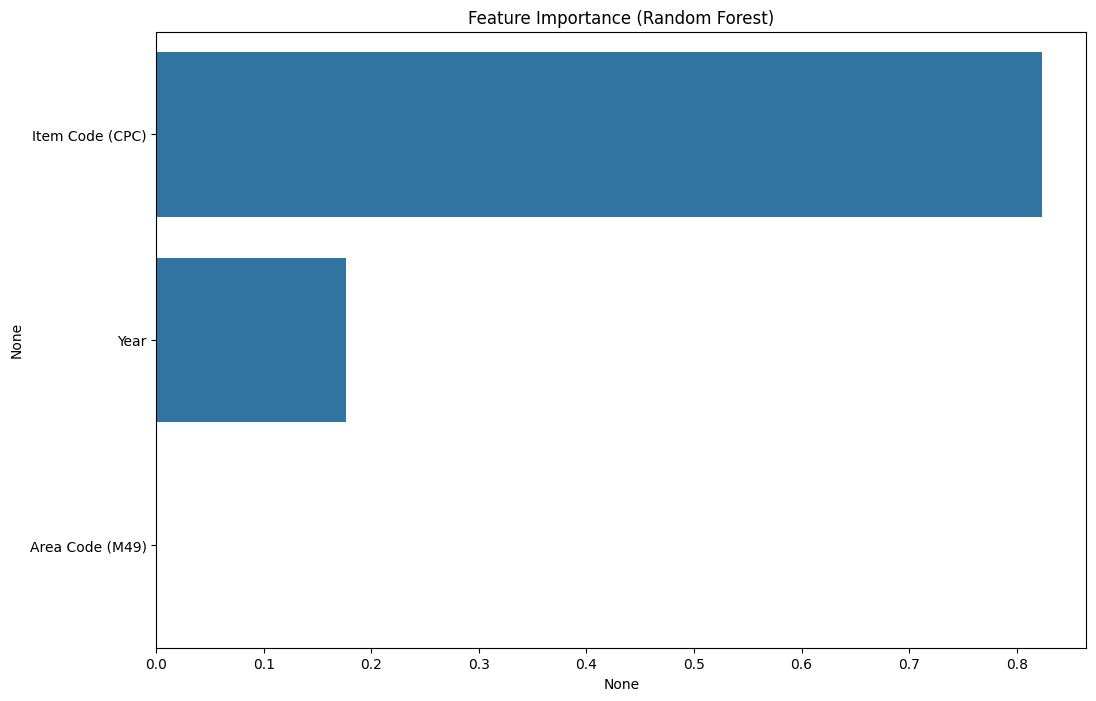

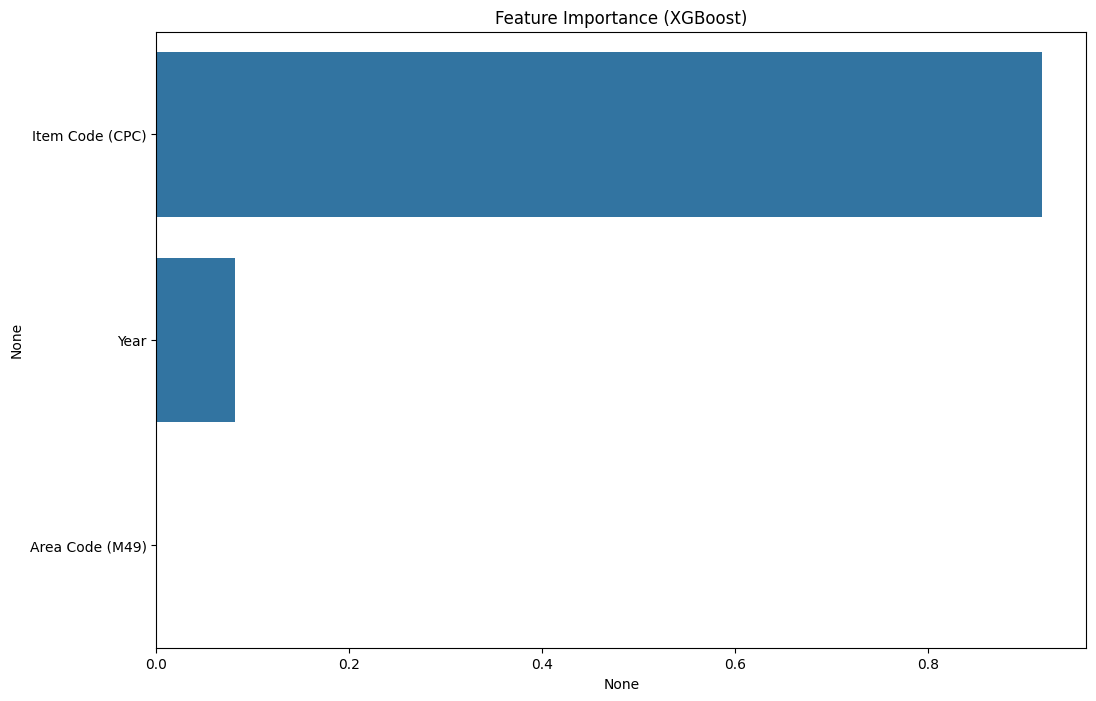

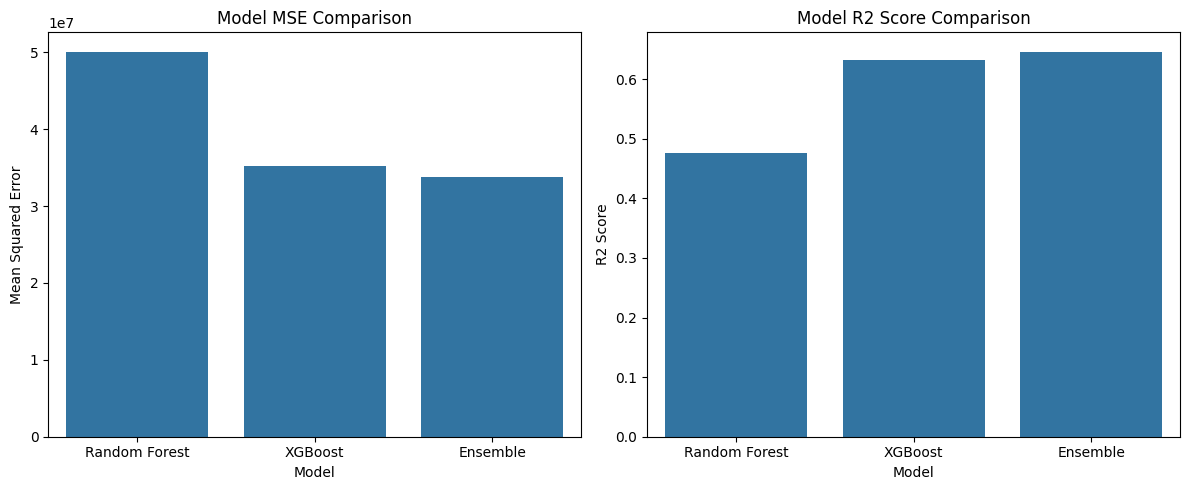

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# a) Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ensemble_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Predicted vs Actual Crop Yield (Ensemble Model)')
plt.show()

# b) Feature Importance for Random Forest and XGBoost
# For Random Forest
rf_importances = rf_model.feature_importances_
rf_features = pd.Series(rf_importances, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_features, y=rf_features.index)
plt.title('Feature Importance (Random Forest)')
plt.show()

# For XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_features = pd.Series(xgb_importances, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=xgb_features, y=xgb_features.index)
plt.title('Feature Importance (XGBoost)')
plt.show()

# c) Model Performance Comparison
model_names = ['Random Forest', 'XGBoost', 'Ensemble']
mse_values = [mean_squared_error(y_test, rf_preds), mean_squared_error(y_test, xgb_preds), ensemble_mse]
r2_values = [r2_score(y_test, rf_preds), r2_score(y_test, xgb_preds), ensemble_r2]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=mse_values)
plt.title('Model MSE Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=r2_values)
plt.title('Model R2 Score Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


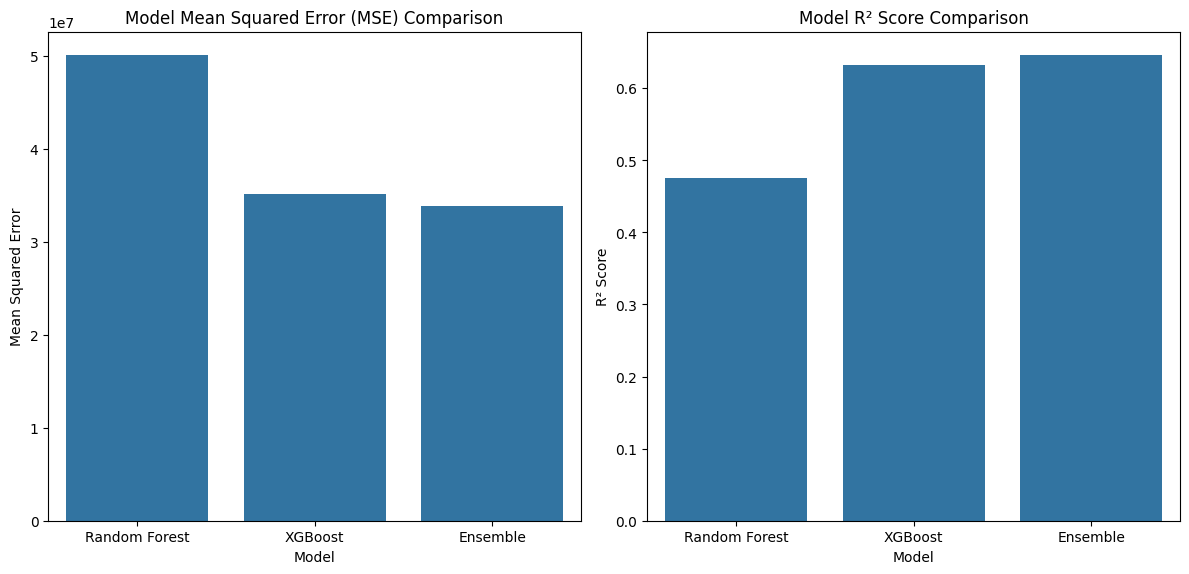

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model Names and Performance Metrics
model_names = ['Random Forest', 'XGBoost', 'Ensemble']
mse_values = [mean_squared_error(y_test, rf_preds), mean_squared_error(y_test, xgb_preds), ensemble_mse]
r2_values = [r2_score(y_test, rf_preds), r2_score(y_test, xgb_preds), ensemble_r2]

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot MSE Comparison
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=mse_values)
plt.title('Model Mean Squared Error (MSE) Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')

# Plot R² Score Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=r2_values)
plt.title('Model R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()


In [ ]:
# # Train Random Forest
# random_forest_model.fit(X_train, y_train)

# # Train XGBoost
# xgboost_model.fit(X_train, y_train)

# # Train Neural Network
# neural_network_model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)

In [ ]:
# # Predict with Random Forest
# rf_predictions = random_forest_model.predict(X_test)

# # Predict with XGBoost
# xgb_predictions = xgboost_model.predict(X_test)

# # Predict with Neural Network
# nn_predictions = neural_network_model.predict(X_test)


In [ ]:
# # Define a function to evaluate models
# def evaluate_model(y_true, y_pred, model_name):
#     mse = mean_squared_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
#     print(f"{model_name} - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")

# # Evaluate each model
# evaluate_model(y_test, rf_predictions, "Random Forest")
# evaluate_model(y_test, xgb_predictions, "XGBoost")
# evaluate_model(y_test, nn_predictions, "Neural Network")


Random Forest - Mean Squared Error: 40594250.94, R2 Score: 0.58
XGBoost - Mean Squared Error: 30806843.68, R2 Score: 0.68
Neural Network - Mean Squared Error: 100931576.86, R2 Score: -0.06
